# FLOWER RECOGNITION KAGGLE CNN KERAS

## 1 ) Importing Various Modules.

In [43]:
#Image recognition CNN
#data - https://www.kaggle.com/alxmamaev/flowers-recognition

#reference: https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras/notebooks
#installed open CV
'''pip install opencv-contrib-python'''

#Checking data file before processing
import os
arr = os.listdir('C://Users//Babita Ratudi//Documents//ML//Project//flowers')
print(arr)

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2          
from tqdm import tqdm
#tqdm- Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## 2 ) Preparing the Data

### 2.1)Making the functions to get the training and validation set from the Images

In [2]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C://Users//Babita Ratudi//Documents//ML//Project//flowers//daisy'
FLOWER_SUNFLOWER_DIR='C://Users//Babita Ratudi//Documents//ML//Project//flowers//sunflower'
FLOWER_TULIP_DIR='C://Users//Babita Ratudi//Documents//ML//Project//flowers//tulip'
FLOWER_DANDI_DIR='C://Users//Babita Ratudi//Documents//ML//Project//flowers//dandelion'
FLOWER_ROSE_DIR='C://Users//Babita Ratudi//Documents//ML//Project//flowers//rose'

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:22<00:00, 34.45it/s]


769


In [6]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:08<00:00, 81.95it/s]


1503


In [7]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:11<00:00, 86.05it/s] 


2487


In [8]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|█████████▉| 1052/1055 [00:35<00:00, 25.70it/s]

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


100%|█████████▉| 1052/1055 [00:50<00:00, 25.70it/s]

In [9]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))


100%|██████████| 784/784 [00:12<00:00, 62.33it/s]


4323


### 2.2)Visualizing some Random Images

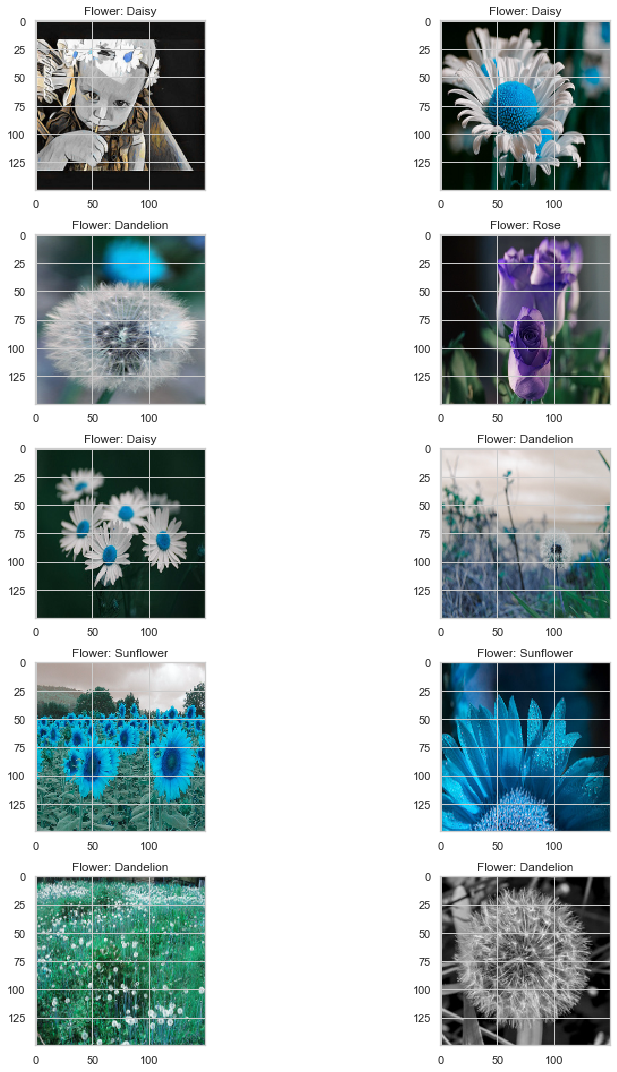

In [10]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### 2.3)Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [11]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### 2.4)Splitting into Training and Validation Sets

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### 2.5)Setting the Random Seeds

In [13]:
#Setting the Random Seeds
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

## 3 ) Modelling

### 3.1 ) Building the ConvNet Model

In [14]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

###  3.2 ) Using a LR Annealer

In [21]:
batch_size=128
epochs=25

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

### 3.3 ) Data Augmentation to prevent Overfitting

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

### 3.4 ) Compiling the Keras Model & Summary

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

### 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/25
25/25 [==============================] - ETA: 43:28 - loss: 0.6822 - accuracy: 0.750 - ETA: 23:01 - loss: 0.7972 - accuracy: 0.695 - ETA: 15:10 - loss: 0.7835 - accuracy: 0.705 - ETA: 11:15 - loss: 0.7831 - accuracy: 0.701 - ETA: 9:03 - loss: 0.7604 - accuracy: 0.711 - ETA: 7:21 - loss: 0.7316 - accuracy: 0.71 - ETA: 6:07 - loss: 0.7342 - accuracy: 0.71 - ETA: 5:11 - loss: 0.7314 - accuracy: 0.72 - ETA: 4:35 - loss: 0.7168 - accuracy: 0.72 - ETA: 3:57 - loss: 0.7118 - accuracy: 0.73 - ETA: 3:26 - loss: 0.7042 - accuracy: 0.73 - ETA: 2:59 - loss: 0.7036 - accuracy: 0.73 - ETA: 2:36 - loss: 0.7051 - accuracy: 0.74 - ETA: 2:15 - loss: 0.7029 - accuracy: 0.73 - ETA: 1:57 - loss: 0.6995 - accuracy: 0.74 - ETA: 1:41 - loss: 0.6964 - accuracy: 0.74 - ETA: 1:26 - loss: 0.6897 - accuracy: 0.74 - ETA: 1:12 - loss: 0.6860 - accuracy: 0.74 - ETA: 1:00 - loss: 0.6851 - accuracy: 0.74 - ETA: 48s - loss: 0.6849 - accuracy: 0.7474 - ETA: 37s - loss: 0.6808 - accuracy: 0.747 - ETA: 27s - los

##  4 ) Evaluating the Model Performance

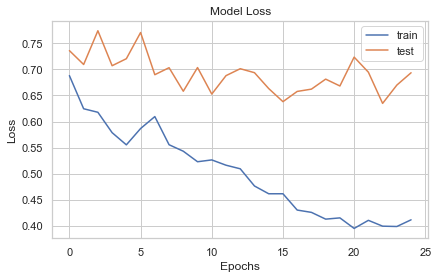

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

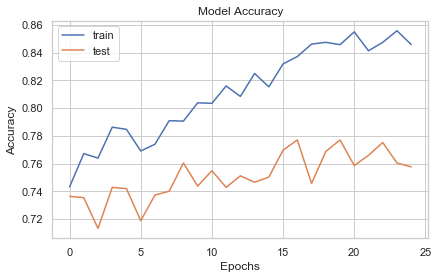

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
model.save('flowers_model2.h5') 

In [30]:
from tensorflow.keras.models import load_model

In [31]:
model2 = load_model('flowers_model2.h5')

## 5)Prediction

In [53]:
#To resize original image to standard format and saving it
img1 = Image.open('C://Users//Babita Ratudi//Documents//ML//Project//predictit.jpeg')
imResize = img1.resize((150,150), Image.ANTIALIAS)
imResize.save('predictit.jpeg', 'JPEG', quality=90)

In [55]:
predictimg=cv2.imread("predictit.jpeg",1)
predictimg=np.array(predictimg)
plt.imshow(predictimg)
predictimg=predictimg/255.0

predictimg = np.expand_dims(predictimg, axis=0)
predictimg.shape

(1, 150, 150, 3)

In [56]:
predition=model.predict(predictimg)

predition=np.squeeze(predition)
print(predition)
predIndex=np.argmax(predition)

[7.60330074e-03 4.51654536e-09 8.76702666e-01 1.82549375e-05
 1.15675814e-01]


In [57]:
print("The Species of given image is",arr[predIndex])

The Species of given image is rose
